In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Ensure the data directory exists
if not os.path.exists('data'):
    os.makedirs('data')

# List of raw-GitHub URLs to download
urls = [
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/clean_books.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/clean_unemployment.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/divorce.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/ds_salaries_clean.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/ds_salaries.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/planes.csv",
]

# Run wget in quiet mode for each URL
for url in urls:
    # -q suppresses all output; -P directs output into 'data/' directory
    !wget -q -P data/ "{url}"

# Single success message
print("All files downloaded successfully.")


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


All files downloaded successfully.


## Getting to Know a Dataset
What's the best way to approach a new dataset? Learn to validate and summarize categorical and numerical data and create Seaborn visualizations to communicate your findings.




In [3]:
books = pd.read_csv("data/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


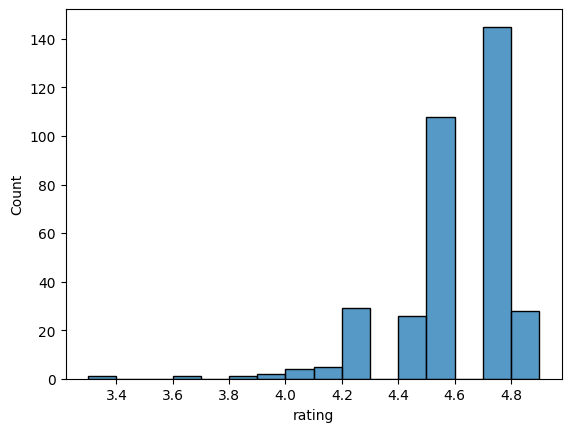

In [4]:
sns.histplot(data=books, x="rating", binwidth=.1)
plt.show()

In [5]:
books.groupby("genre").mean(numeric_only=True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [6]:
books.select_dtypes(include=np.number).agg(["mean", "std"])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [7]:
books.select_dtypes(include=np.number).agg({"rating": ["mean", "std"], "year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [8]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


### Summaries with .groupby() and .agg()
In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

In [9]:
unemployment = pd.read_csv("data/clean_unemployment.csv")

In [10]:
# Print yearly mean and standard deviation grouped by continent
display(unemployment.select_dtypes(include=np.number).agg(["mean", "std"]))

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [11]:
# Print yearly mean and standard deviation grouped by continent
year_cols = [col for col in unemployment.columns if col.isdigit()]
display(unemployment.groupby("continent")[year_cols].agg(["mean", "std"]))


2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

### Named aggregations
You've seen how `.groupby()` and `.agg()` can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called `continent_summary` which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

In [12]:

continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "mean")
)
display(continent_summary)

,mean_rate_2021,std_rate_2021
continent,,
Africa,10.473585,10.473585
Asia,6.906170,6.906170
Europe,7.414872,7.414872
North America,9.155000,9.155000
Oceania,4.280000,4.280000
South America,9.924167,9.924167


C:\Users\lerea\AppData\Local\Temp\ipykernel_1740\4049570833.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


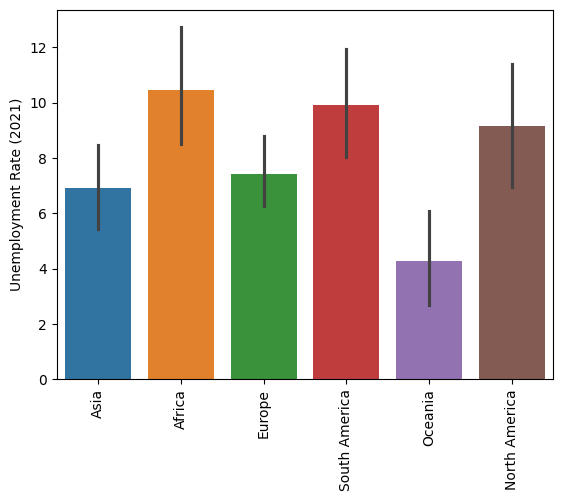

In [13]:
# Create a bar plot of continents and their average unemployment
fig, ax = plt.subplots()
sns.barplot(x="continent", y="2021", data=unemployment, hue="continent", legend=False)
ax.set_xlabel("") # Set the x-label to an empty string
ax.set_ylabel("Unemployment Rate (2021)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## Data Cleaning and Imputation
Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!



In [19]:
ds_salaries = pd.read_csv("data/ds_salaries.csv")

In [22]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [23]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [24]:
ds_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000
